# 15. 프로젝트: 문자를 읽을 수 있는 딥러닝


## 목차

>   <p style="font-size:17px">Step1. 검증용 데이터셋 준비</p>
    <p style="font-size:17px">Step2. keras-ocr, Tesseract로 테스트 진행</p> 
    <p style="font-size:17px">Step3. 테스트 결과 정리</p>
    <p style="font-size:17px">Step4. 결과 분석과 결론 제시</p>
    

## 루브릭 (프로젝트 평가 기준)

> |<p style="font-size:15px"> 평가문항 </p>                                |<p style="font-size:15px"> 상세기준 </p>        |
  |------------------------------------------------------------------------|------------------------------------------------|
  |1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가? | 목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
  |2. 모델 평가기준이 명확하고 체계적으로 세워졌는가? | 평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
  |3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가? | 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

In [1]:
import keras_ocr
import pytesseract
import os

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


# CHEMICALS

## Step1. 검증용 데이터셋 준비
---


In [2]:
chemical_img_dir = os.getenv('HOME') + '/aiffel/explore15_OCR/chemical'
chemical_list = os.listdir(chemical_img_dir)
chemical_list

['chemical_9.png',
 'chemical_1.png',
 'chemical_7.png',
 'chemical_3.png',
 'chemical_10.png',
 'chemical_8.png',
 'chemical_4.png',
 'chemical_2.png',
 'chemical_5.png',
 'chemical_6.png']

## Step2. keras-ocr, Tesseract로 테스트 진행
---


### Step2-1. keras-ocr

In [3]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [4]:
images = [ keras_ocr.tools.read(os.path.join(chemical_img_dir, chemical)) for chemical in chemical_list]
prediction_groups = [pipeline.recognize([os.path.join(chemical_img_dir, chemical)]) for chemical in chemical_list]

In [1]:
# Plot the predictions
#fig, axs = plt.subplots(nrows=len(images), figsize=(200, 200))
#for idx, ax in enumerate(axs):
#    keras_ocr.tools.drawAnnotations(image=images[idx], 
#                                    predictions=prediction_groups[idx][0], ax=ax)

### Step2-2. Tesseract

In [2]:
# import os
# import pytesseract
# from PIL import Image
# from pytesseract import Output
# import matplotlib.pyplot as plt

# # OCR Engine modes(–oem):
# # 0 - Legacy engine only.
# # 1 - Neural nets LSTM engine only.
# # 2 - Legacy + LSTM engines.
# # 3 - Default, based on what is available.

# # Page segmentation modes(–psm):
# # 0 - Orientation and script detection (OSD) only.
# # 1 - Automatic page segmentation with OSD.
# # 2 - Automatic page segmentation, but no OSD, or OCR.
# # 3 - Fully automatic page segmentation, but no OSD. (Default)
# # 4 - Assume a single column of text of variable sizes.
# # 5 - Assume a single uniform block of vertically aligned text.
# # 6 - Assume a single uniform block of text.
# # 7 - Treat the image as a single text line.
# # 8 - Treat the image as a single word.
# # 9 - Treat the image as a single word in a circle.
# # 10 - Treat the image as a single character.
# # 11 - Sparse text. Find as much text as possible in no particular order.
# # 12 - Sparse text with OSD.
# # 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

# def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
#     if not os.path.exists(output_path):
#         os.mkdir(output_path)
#     custom_oem_psm_config = r'--oem 3 --psm 3'
#     image = Image.open(image_path)

#     recognized_data = pytesseract.image_to_data(
#         image, lang='eng',    # 한국어라면 lang='kor'
#         config=custom_oem_psm_config,
#         output_type=Output.DICT
#     )
    
#     top_level = max(recognized_data['level'])
#     index = 0
#     cropped_image_path_list = []
#     for i in range(len(recognized_data['level'])):
#         level = recognized_data['level'][i]
    
#         if level == top_level:
#             left = recognized_data['left'][i]
#             top = recognized_data['top'][i]
#             width = recognized_data['width'][i]
#             height = recognized_data['height'][i]
            
#             output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
#             print(output_img_path)
#             cropped_image = image.crop((
#                 left,
#                 top,
#                 left+width,
#                 top+height
#             ))
#             cropped_image.save(output_img_path)
#             cropped_image_path_list.append(output_img_path)
#             index += 1
#     return cropped_image_path_list



# def recognize_images(cropped_image_path_list):
#     custom_oem_psm_config = r'--oem 3 --psm 7'
    
#     for image_path in cropped_image_path_list:
#         image = Image.open(image_path)
#         recognized_data = pytesseract.image_to_string(
#             image, lang='eng',    # 한국어라면 lang='kor'
#             config=custom_oem_psm_config,
#             output_type=Output.DICT
#         )
#         print(recognized_data['text'])
#     print("Done")

    
# work_dir = os.getenv('HOME')+'/aiffel/explore15_OCR/chemical/'
# save_dir = os.getenv('HOME')+'/aiffel/explore15_OCR/chemical/tesseract_cropped'

# for i in chemical_list:
#     print(f'[{i}]')
#     img_file_path = work_dir + i
#     cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

#     # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
#     recognize_images(cropped_image_path_list)
    




## Step3. 테스트 결과 정리
---


#### chemical_1

[keras-ocr]


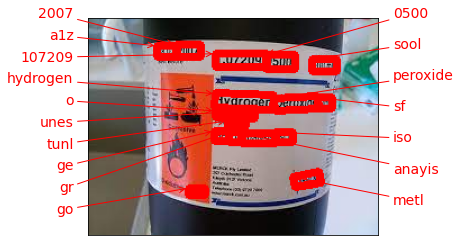



[Tesseract]
/aiffel/aiffel/explore15_OCR/chemical/0000.png
/aiffel/aiffel/explore15_OCR/chemical/0001.png
/aiffel/aiffel/explore15_OCR/chemical/0002.png
/aiffel/aiffel/explore15_OCR/chemical/0003.png
/aiffel/aiffel/explore15_OCR/chemical/0004.png
/aiffel/aiffel/explore15_OCR/chemical/0005.png
' ao orem rt

mydrogen

DErOxide wl

i

=


Done


In [7]:
print('[keras-ocr]')
idx = chemical_list.index('chemical_1.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'chemical_1.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

#### chemical_2

[keras-ocr]


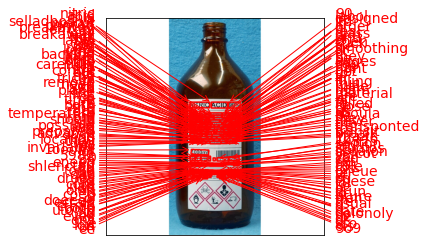



[Tesseract]
/aiffel/aiffel/explore15_OCR/chemical/0000.png
/aiffel/aiffel/explore15_OCR/chemical/0001.png
/aiffel/aiffel/explore15_OCR/chemical/0002.png
/aiffel/aiffel/explore15_OCR/chemical/0003.png
/aiffel/aiffel/explore15_OCR/chemical/0004.png
/aiffel/aiffel/explore15_OCR/chemical/0005.png
/aiffel/aiffel/explore15_OCR/chemical/0006.png
/aiffel/aiffel/explore15_OCR/chemical/0007.png
/aiffel/aiffel/explore15_OCR/chemical/0008.png
/aiffel/aiffel/explore15_OCR/chemical/0009.png
/aiffel/aiffel/explore15_OCR/chemical/0010.png
/aiffel/aiffel/explore15_OCR/chemical/0011.png
/aiffel/aiffel/explore15_OCR/chemical/0012.png
/aiffel/aiffel/explore15_OCR/chemical/0013.png
/aiffel/aiffel/explore15_OCR/chemical/0014.png
/aiffel/aiffel/explore15_OCR/chemical/0015.png
/aiffel/aiffel/explore15_OCR/chemical/0016.png
/aiffel/aiffel/explore15_OCR/chemical/0017.png
/aiffel/aiffel/explore15_OCR/chemical/0018.png
/aiffel/aiffel/explore15_OCR/chemical/0019.png
/aiffel/aiffel/explore15_OCR/chemical/0020.png

In [8]:
print('[keras-ocr]')
idx = chemical_list.index('chemical_2.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'chemical_2.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

#### chemical_3

[keras-ocr]


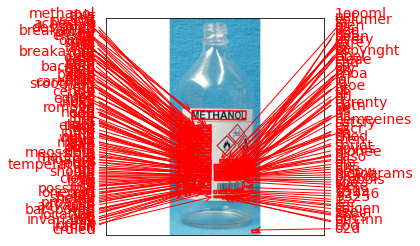



[Tesseract]
/aiffel/aiffel/explore15_OCR/chemical/0000.png
/aiffel/aiffel/explore15_OCR/chemical/0001.png
/aiffel/aiffel/explore15_OCR/chemical/0002.png
/aiffel/aiffel/explore15_OCR/chemical/0003.png
/aiffel/aiffel/explore15_OCR/chemical/0004.png
/aiffel/aiffel/explore15_OCR/chemical/0005.png
/aiffel/aiffel/explore15_OCR/chemical/0006.png
/aiffel/aiffel/explore15_OCR/chemical/0007.png
/aiffel/aiffel/explore15_OCR/chemical/0008.png
/aiffel/aiffel/explore15_OCR/chemical/0009.png
/aiffel/aiffel/explore15_OCR/chemical/0010.png
/aiffel/aiffel/explore15_OCR/chemical/0011.png
/aiffel/aiffel/explore15_OCR/chemical/0012.png
/aiffel/aiffel/explore15_OCR/chemical/0013.png
/aiffel/aiffel/explore15_OCR/chemical/0014.png
/aiffel/aiffel/explore15_OCR/chemical/0015.png
/aiffel/aiffel/explore15_OCR/chemical/0016.png
/aiffel/aiffel/explore15_OCR/chemical/0017.png
/aiffel/aiffel/explore15_OCR/chemical/0018.png
/aiffel/aiffel/explore15_OCR/chemical/0019.png
/aiffel/aiffel/explore15_OCR/chemical/0020.png

In [9]:
print('[keras-ocr]')
idx = chemical_list.index('chemical_3.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'chemical_3.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

#### chemical_4

[keras-ocr]


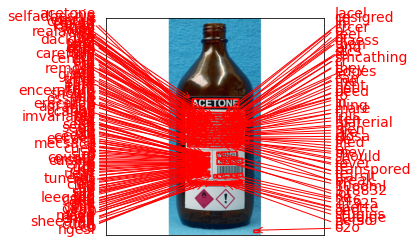



[Tesseract]
/aiffel/aiffel/explore15_OCR/chemical/0000.png
/aiffel/aiffel/explore15_OCR/chemical/0001.png
/aiffel/aiffel/explore15_OCR/chemical/0002.png
/aiffel/aiffel/explore15_OCR/chemical/0003.png
/aiffel/aiffel/explore15_OCR/chemical/0004.png
/aiffel/aiffel/explore15_OCR/chemical/0005.png
/aiffel/aiffel/explore15_OCR/chemical/0006.png
/aiffel/aiffel/explore15_OCR/chemical/0007.png
/aiffel/aiffel/explore15_OCR/chemical/0008.png
/aiffel/aiffel/explore15_OCR/chemical/0009.png
/aiffel/aiffel/explore15_OCR/chemical/0010.png
/aiffel/aiffel/explore15_OCR/chemical/0011.png
/aiffel/aiffel/explore15_OCR/chemical/0012.png
/aiffel/aiffel/explore15_OCR/chemical/0013.png
/aiffel/aiffel/explore15_OCR/chemical/0014.png
/aiffel/aiffel/explore15_OCR/chemical/0015.png
/aiffel/aiffel/explore15_OCR/chemical/0016.png
/aiffel/aiffel/explore15_OCR/chemical/0017.png
/aiffel/aiffel/explore15_OCR/chemical/0018.png
4

ACETONE

1000mi

| ot

N°:

3189?

MIA

19325

92446

Sabre rec

and | Abe

STu

In [10]:
print('[keras-ocr]')
idx = chemical_list.index('chemical_4.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'chemical_4.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

#### chemical_5

[keras-ocr]


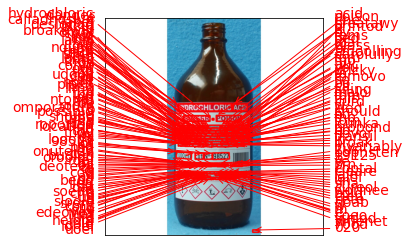



[Tesseract]
/aiffel/aiffel/explore15_OCR/chemical/0000.png
/aiffel/aiffel/explore15_OCR/chemical/0001.png
/aiffel/aiffel/explore15_OCR/chemical/0002.png
/aiffel/aiffel/explore15_OCR/chemical/0003.png
/aiffel/aiffel/explore15_OCR/chemical/0004.png
/aiffel/aiffel/explore15_OCR/chemical/0005.png
/aiffel/aiffel/explore15_OCR/chemical/0006.png
HYDROCHLORIC

ACID

DANGE

t -

od & _ ¢



Done


In [11]:
print('[keras-ocr]')
idx = chemical_list.index('chemical_5.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'chemical_5.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

#### chemical_6

[keras-ocr]


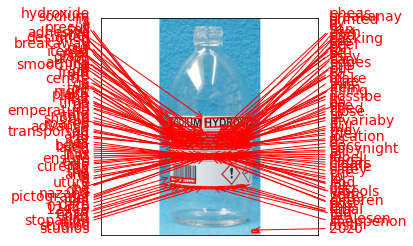



[Tesseract]
/aiffel/aiffel/explore15_OCR/chemical/0000.png
/aiffel/aiffel/explore15_OCR/chemical/0001.png
/aiffel/aiffel/explore15_OCR/chemical/0002.png
/aiffel/aiffel/explore15_OCR/chemical/0003.png
/aiffel/aiffel/explore15_OCR/chemical/0004.png
/aiffel/aiffel/explore15_OCR/chemical/0005.png
/aiffel/aiffel/explore15_OCR/chemical/0006.png
/aiffel/aiffel/explore15_OCR/chemical/0007.png
/aiffel/aiffel/explore15_OCR/chemical/0008.png
/aiffel/aiffel/explore15_OCR/chemical/0009.png
/aiffel/aiffel/explore15_OCR/chemical/0010.png
/aiffel/aiffel/explore15_OCR/chemical/0011.png
/aiffel/aiffel/explore15_OCR/chemical/0012.png
/aiffel/aiffel/explore15_OCR/chemical/0013.png
/aiffel/aiffel/explore15_OCR/chemical/0014.png
/aiffel/aiffel/explore15_OCR/chemical/0015.png
/aiffel/aiffel/explore15_OCR/chemical/0016.png
/aiffel/aiffel/explore15_OCR/chemical/0017.png
/aiffel/aiffel/explore15_OCR/chemical/0018.png
/aiffel/aiffel/explore15_OCR/chemical/0019.png
/aiffel/aiffel/explore15_OCR/chemical/0020.png

In [12]:
print('[keras-ocr]')
idx = chemical_list.index('chemical_6.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'chemical_6.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

#### chemical_7

[keras-ocr]


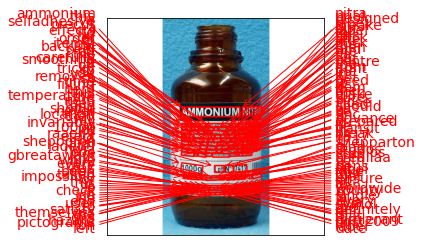



[Tesseract]
/aiffel/aiffel/explore15_OCR/chemical/0000.png
/aiffel/aiffel/explore15_OCR/chemical/0001.png
/aiffel/aiffel/explore15_OCR/chemical/0002.png
/aiffel/aiffel/explore15_OCR/chemical/0003.png
/aiffel/aiffel/explore15_OCR/chemical/0004.png
/aiffel/aiffel/explore15_OCR/chemical/0005.png
/aiffel/aiffel/explore15_OCR/chemical/0006.png
/aiffel/aiffel/explore15_OCR/chemical/0007.png
/aiffel/aiffel/explore15_OCR/chemical/0008.png
/aiffel/aiffel/explore15_OCR/chemical/0009.png
/aiffel/aiffel/explore15_OCR/chemical/0010.png
/aiffel/aiffel/explore15_OCR/chemical/0011.png
/aiffel/aiffel/explore15_OCR/chemical/0012.png
/aiffel/aiffel/explore15_OCR/chemical/0013.png
/aiffel/aiffel/explore15_OCR/chemical/0014.png
/aiffel/aiffel/explore15_OCR/chemical/0015.png
/aiffel/aiffel/explore15_OCR/chemical/0016.png
/aiffel/aiffel/explore15_OCR/chemical/0017.png
/aiffel/aiffel/explore15_OCR/chemical/0018.png
/aiffel/aiffel/explore15_OCR/chemical/0019.png
/aiffel/aiffel/explore15_OCR/chemical/0020.png

In [13]:
print('[keras-ocr]')
idx = chemical_list.index('chemical_7.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'chemical_7.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

#### chemical_8

[keras-ocr]


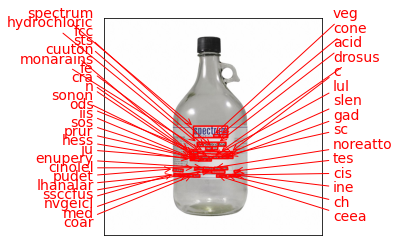



[Tesseract]
/aiffel/aiffel/explore15_OCR/chemical/0000.png
.

Done


In [14]:
print('[keras-ocr]')
idx = chemical_list.index('chemical_8.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'chemical_8.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

#### chemical_9

[keras-ocr]


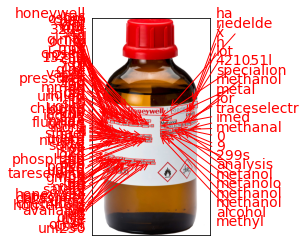



[Tesseract]
/aiffel/aiffel/explore15_OCR/chemical/0000.png
/aiffel/aiffel/explore15_OCR/chemical/0001.png
/aiffel/aiffel/explore15_OCR/chemical/0002.png
/aiffel/aiffel/explore15_OCR/chemical/0003.png
/aiffel/aiffel/explore15_OCR/chemical/0004.png
/aiffel/aiffel/explore15_OCR/chemical/0005.png
/aiffel/aiffel/explore15_OCR/chemical/0006.png
/aiffel/aiffel/explore15_OCR/chemical/0007.png
/aiffel/aiffel/explore15_OCR/chemical/0008.png
/aiffel/aiffel/explore15_OCR/chemical/0009.png
/aiffel/aiffel/explore15_OCR/chemical/0010.png
/aiffel/aiffel/explore15_OCR/chemical/0011.png
/aiffel/aiffel/explore15_OCR/chemical/0012.png
/aiffel/aiffel/explore15_OCR/chemical/0013.png
/aiffel/aiffel/explore15_OCR/chemical/0014.png
/aiffel/aiffel/explore15_OCR/chemical/0015.png
/aiffel/aiffel/explore15_OCR/chemical/0016.png
/aiffel/aiffel/explore15_OCR/chemical/0017.png
/aiffel/aiffel/explore15_OCR/chemical/0018.png
/aiffel/aiffel/explore15_OCR/chemical/0019.png
/aiffel/aiffel/explore15_OCR/chemical/0020.png

In [15]:
print('[keras-ocr]')
idx = chemical_list.index('chemical_9.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'chemical_9.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

#### chemical_10

[keras-ocr]


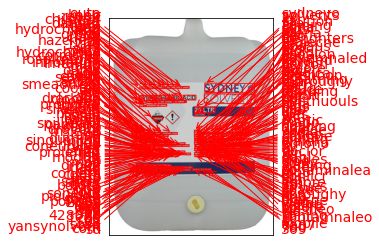



[Tesseract]
/aiffel/aiffel/explore15_OCR/chemical/0000.png
/aiffel/aiffel/explore15_OCR/chemical/0001.png
/aiffel/aiffel/explore15_OCR/chemical/0002.png
/aiffel/aiffel/explore15_OCR/chemical/0003.png
/aiffel/aiffel/explore15_OCR/chemical/0004.png
/aiffel/aiffel/explore15_OCR/chemical/0005.png
/aiffel/aiffel/explore15_OCR/chemical/0006.png
/aiffel/aiffel/explore15_OCR/chemical/0007.png
/aiffel/aiffel/explore15_OCR/chemical/0008.png
/aiffel/aiffel/explore15_OCR/chemical/0009.png
/aiffel/aiffel/explore15_OCR/chemical/0010.png
/aiffel/aiffel/explore15_OCR/chemical/0011.png
/aiffel/aiffel/explore15_OCR/chemical/0012.png
/aiffel/aiffel/explore15_OCR/chemical/0013.png
/aiffel/aiffel/explore15_OCR/chemical/0014.png
/aiffel/aiffel/explore15_OCR/chemical/0015.png
/aiffel/aiffel/explore15_OCR/chemical/0016.png
/aiffel/aiffel/explore15_OCR/chemical/0017.png
/aiffel/aiffel/explore15_OCR/chemical/0018.png
/aiffel/aiffel/explore15_OCR/chemical/0019.png
/aiffel/aiffel/explore15_OCR/chemical/0020.png

In [16]:
print('[keras-ocr]')
idx = chemical_list.index('chemical_10.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'chemical_10.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

# Drugs

## Step1. 검증용 데이터셋 준비
---

In [17]:
drug_img_dir = os.getenv('HOME') + '/aiffel/explore15_OCR/drug'
drug_list = os.listdir(drug_img_dir)
drug_list


['drug_2.png',
 'drug_5.png',
 'drug_1.png',
 'drug_7.png',
 'drug_6.png',
 'drug_9.png',
 'drug_10.png',
 'drug_3.png',
 'drug_4.png',
 'drug_8.png']

## Step2. keras-ocr, Tesseract로 테스트 진행
---

### Step2-1. keras-ocr

In [18]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()


Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [19]:
images = [ keras_ocr.tools.read(os.path.join(drug_img_dir, drug)) for drug in drug_list]
prediction_groups = [pipeline.recognize([os.path.join(drug_img_dir, drug)]) for drug in drug_list]

In [3]:
# # Plot the predictions
# fig, axs = plt.subplots(nrows=len(images), figsize=(200, 200))
# for idx, ax in enumerate(axs):
#     keras_ocr.tools.drawAnnotations(image=images[idx], 
#                                     predictions=prediction_groups[idx][0], ax=ax)

### Step2-2. Tesseract

In [4]:
# import os
# import pytesseract
# from PIL import Image
# from pytesseract import Output
# import matplotlib.pyplot as plt

# # OCR Engine modes(–oem):
# # 0 - Legacy engine only.
# # 1 - Neural nets LSTM engine only.
# # 2 - Legacy + LSTM engines.
# # 3 - Default, based on what is available.

# # Page segmentation modes(–psm):
# # 0 - Orientation and script detection (OSD) only.
# # 1 - Automatic page segmentation with OSD.
# # 2 - Automatic page segmentation, but no OSD, or OCR.
# # 3 - Fully automatic page segmentation, but no OSD. (Default)
# # 4 - Assume a single column of text of variable sizes.
# # 5 - Assume a single uniform block of vertically aligned text.
# # 6 - Assume a single uniform block of text.
# # 7 - Treat the image as a single text line.
# # 8 - Treat the image as a single word.
# # 9 - Treat the image as a single word in a circle.
# # 10 - Treat the image as a single character.
# # 11 - Sparse text. Find as much text as possible in no particular order.
# # 12 - Sparse text with OSD.
# # 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

# def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
#     if not os.path.exists(output_path):
#         os.mkdir(output_path)
#     custom_oem_psm_config = r'--oem 3 --psm 3'
#     image = Image.open(image_path)

#     recognized_data = pytesseract.image_to_data(
#         image, lang='eng',    # 한국어라면 lang='kor'
#         config=custom_oem_psm_config,
#         output_type=Output.DICT
#     )
    
#     top_level = max(recognized_data['level'])
#     index = 0
#     cropped_image_path_list = []
#     for i in range(len(recognized_data['level'])):
#         level = recognized_data['level'][i]
    
#         if level == top_level:
#             left = recognized_data['left'][i]
#             top = recognized_data['top'][i]
#             width = recognized_data['width'][i]
#             height = recognized_data['height'][i]
            
#             output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
#             print(output_img_path)
#             cropped_image = image.crop((
#                 left,
#                 top,
#                 left+width,
#                 top+height
#             ))
#             cropped_image.save(output_img_path)
#             cropped_image_path_list.append(output_img_path)
#             index += 1
#     return cropped_image_path_list



# def recognize_images(cropped_image_path_list):
#     custom_oem_psm_config = r'--oem 3 --psm 7'
    
#     for image_path in cropped_image_path_list:
#         image = Image.open(image_path)
#         recognized_data = pytesseract.image_to_string(
#             image, lang='eng',    # 한국어라면 lang='kor'
#             config=custom_oem_psm_config,
#             output_type=Output.DICT
#         )
#         print(recognized_data['text'])
#     print("Done")

    
# work_dir = os.getenv('HOME')+'/aiffel/explore15_OCR/drug/'
# save_dir = os.getenv('HOME')+'/aiffel/explore15_OCR/drug/tesseract_cropped'

# for i in drug_list:
#     print(f'[{i}]')
#     img_file_path = work_dir + i
#     cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

#     # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
#     recognize_images(cropped_image_path_list)


## Step3. 테스트 결과 정리

#### drug_1

[keras-ocr]


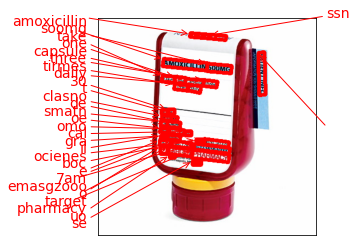



[Tesseract]
/aiffel/aiffel/explore15_OCR/drug/0000.png
= | :

Done


In [22]:
print('[keras-ocr]')
idx = drug_list.index('drug_1.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'drug_1.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### drug_2

[keras-ocr]


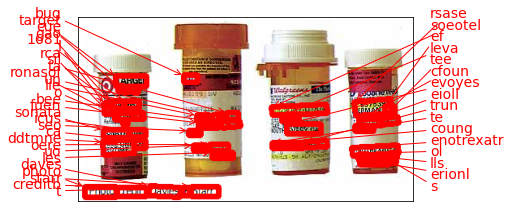



[Tesseract]
/aiffel/aiffel/explore15_OCR/drug/0000.png
/aiffel/aiffel/explore15_OCR/drug/0001.png
/aiffel/aiffel/explore15_OCR/drug/0002.png
/aiffel/aiffel/explore15_OCR/drug/0003.png
/aiffel/aiffel/explore15_OCR/drug/0004.png
/aiffel/aiffel/explore15_OCR/drug/0005.png
2 7

[enoto

eacent

ayes

+

Starr }

Done


In [23]:
print('[keras-ocr]')
idx = drug_list.index('drug_2.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'drug_2.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### drug_3

[keras-ocr]


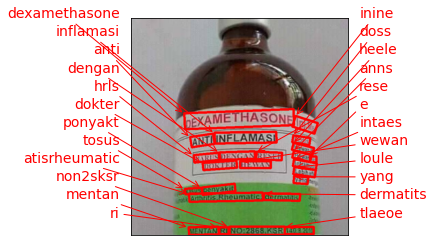



[Tesseract]
/aiffel/aiffel/explore15_OCR/drug/0000.png
/aiffel/aiffel/explore15_OCR/drug/0001.png
/aiffel/aiffel/explore15_OCR/drug/0002.png
/aiffel/aiffel/explore15_OCR/drug/0003.png
/aiffel/aiffel/explore15_OCR/drug/0004.png
/aiffel/aiffel/explore15_OCR/drug/0005.png
/aiffel/aiffel/explore15_OCR/drug/0006.png
/aiffel/aiffel/explore15_OCR/drug/0007.png
/aiffel/aiffel/explore15_OCR/drug/0008.png
/aiffel/aiffel/explore15_OCR/drug/0009.png
/aiffel/aiffel/explore15_OCR/drug/0010.png
/aiffel/aiffel/explore15_OCR/drug/0011.png
/aiffel/aiffel/explore15_OCR/drug/0012.png
/aiffel/aiffel/explore15_OCR/drug/0013.png
/aiffel/aiffel/explore15_OCR/drug/0014.png
/aiffel/aiffel/explore15_OCR/drug/0015.png
/aiffel/aiffel/explore15_OCR/drug/0016.png
/aiffel/aiffel/explore15_OCR/drug/0017.png
/aiffel/aiffel/explore15_OCR/drug/0018.png
/aiffel/aiffel/explore15_OCR/drug/0019.png
/aiffel/aiffel/explore15_OCR/drug/0020.png
/aiffel/aiffel/explore15_OCR/drug/0021.png
fe,

“ANTI

TI INFLAMAS|

THAR

»



In [24]:
print('[keras-ocr]')
idx = drug_list.index('drug_3.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'drug_3.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### drug_4

[keras-ocr]


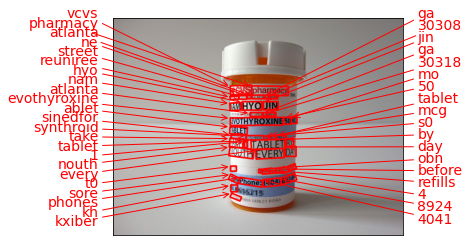



[Tesseract]
/aiffel/aiffel/explore15_OCR/drug/0000.png

Done


In [25]:
print('[keras-ocr]')
idx = drug_list.index('drug_4.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'drug_4.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### drug_5

[keras-ocr]


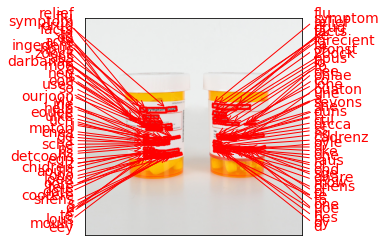



[Tesseract]
/aiffel/aiffel/explore15_OCR/drug/0000.png
/aiffel/aiffel/explore15_OCR/drug/0001.png
/aiffel/aiffel/explore15_OCR/drug/0002.png
/aiffel/aiffel/explore15_OCR/drug/0003.png
/aiffel/aiffel/explore15_OCR/drug/0004.png
/aiffel/aiffel/explore15_OCR/drug/0005.png
/aiffel/aiffel/explore15_OCR/drug/0006.png
/aiffel/aiffel/explore15_OCR/drug/0007.png
/aiffel/aiffel/explore15_OCR/drug/0008.png
/aiffel/aiffel/explore15_OCR/drug/0009.png
/aiffel/aiffel/explore15_OCR/drug/0010.png
/aiffel/aiffel/explore15_OCR/drug/0011.png
/aiffel/aiffel/explore15_OCR/drug/0012.png
/aiffel/aiffel/explore15_OCR/drug/0013.png
/aiffel/aiffel/explore15_OCR/drug/0014.png
/aiffel/aiffel/explore15_OCR/drug/0015.png
/aiffel/aiffel/explore15_OCR/drug/0016.png
/aiffel/aiffel/explore15_OCR/drug/0017.png
/aiffel/aiffel/explore15_OCR/drug/0018.png
/aiffel/aiffel/explore15_OCR/drug/0019.png
/aiffel/aiffel/explore15_OCR/drug/0020.png
/aiffel/aiffel/explore15_OCR/drug/0021.png
/aiffel/aiffel/explore15_OCR/drug/0022.p

In [26]:
print('[keras-ocr]')
idx = drug_list.index('drug_5.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'drug_5.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### drug_6

[keras-ocr]


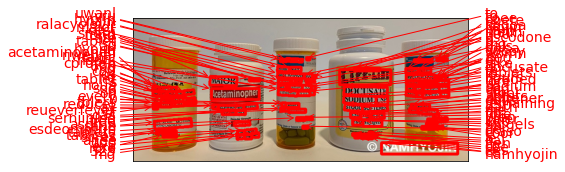



[Tesseract]
/aiffel/aiffel/explore15_OCR/drug/0000.png
/aiffel/aiffel/explore15_OCR/drug/0001.png
/aiffel/aiffel/explore15_OCR/drug/0002.png
/aiffel/aiffel/explore15_OCR/drug/0003.png
/aiffel/aiffel/explore15_OCR/drug/0004.png
/aiffel/aiffel/explore15_OCR/drug/0005.png
/aiffel/aiffel/explore15_OCR/drug/0006.png
/aiffel/aiffel/explore15_OCR/drug/0007.png
/aiffel/aiffel/explore15_OCR/drug/0008.png
/aiffel/aiffel/explore15_OCR/drug/0009.png
/aiffel/aiffel/explore15_OCR/drug/0010.png
/aiffel/aiffel/explore15_OCR/drug/0011.png
/aiffel/aiffel/explore15_OCR/drug/0012.png
/aiffel/aiffel/explore15_OCR/drug/0013.png
/aiffel/aiffel/explore15_OCR/drug/0014.png
/aiffel/aiffel/explore15_OCR/drug/0015.png
/aiffel/aiffel/explore15_OCR/drug/0016.png
/aiffel/aiffel/explore15_OCR/drug/0017.png
——] .

——

ayojin Nam

WACYelovir

U0 me

th vie

’


f= | > =


STOOL

SOFTENER

250

nig

Fach

100

Sofigels

a

Done


In [27]:
print('[keras-ocr]')
idx = drug_list.index('drug_6.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'drug_6.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### drug_7

[keras-ocr]


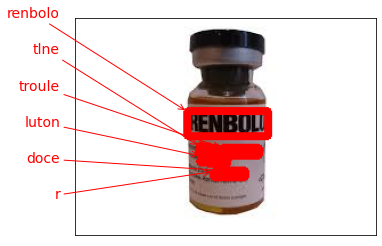



[Tesseract]
/aiffel/aiffel/explore15_OCR/drug/0000.png

Done


In [28]:
print('[keras-ocr]')
idx = drug_list.index('drug_7.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'drug_7.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### drug_8

[keras-ocr]


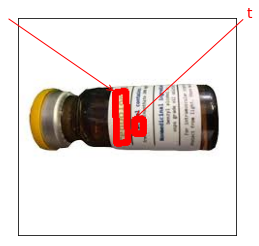



[Tesseract]
/aiffel/aiffel/explore15_OCR/drug/0000.png

Done


In [29]:
print('[keras-ocr]')
idx = drug_list.index('drug_8.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'drug_8.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### drug_9

[keras-ocr]


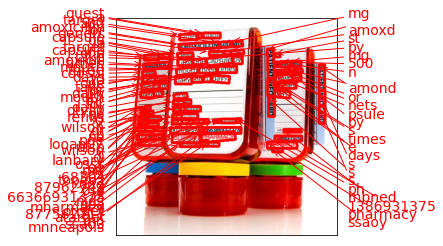



[Tesseract]
/aiffel/aiffel/explore15_OCR/drug/0000.png
/aiffel/aiffel/explore15_OCR/drug/0001.png
/aiffel/aiffel/explore15_OCR/drug/0002.png
/aiffel/aiffel/explore15_OCR/drug/0003.png
/aiffel/aiffel/explore15_OCR/drug/0004.png
/aiffel/aiffel/explore15_OCR/drug/0005.png
/aiffel/aiffel/explore15_OCR/drug/0006.png
/aiffel/aiffel/explore15_OCR/drug/0007.png
/aiffel/aiffel/explore15_OCR/drug/0008.png
/aiffel/aiffel/explore15_OCR/drug/0009.png
/aiffel/aiffel/explore15_OCR/drug/0010.png
/aiffel/aiffel/explore15_OCR/drug/0011.png
/aiffel/aiffel/explore15_OCR/drug/0012.png
/aiffel/aiffel/explore15_OCR/drug/0013.png
/aiffel/aiffel/explore15_OCR/drug/0014.png
/aiffel/aiffel/explore15_OCR/drug/0015.png
/aiffel/aiffel/explore15_OCR/drug/0016.png
/aiffel/aiffel/explore15_OCR/drug/0017.png
/aiffel/aiffel/explore15_OCR/drug/0018.png
/aiffel/aiffel/explore15_OCR/drug/0019.png
/aiffel/aiffel/explore15_OCR/drug/0020.png
/aiffel/aiffel/explore15_OCR/drug/0021.png
/aiffel/aiffel/explore15_OCR/drug/0022.p

In [30]:
print('[keras-ocr]')
idx = drug_list.index('drug_9.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'drug_9.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### drug_10

[keras-ocr]


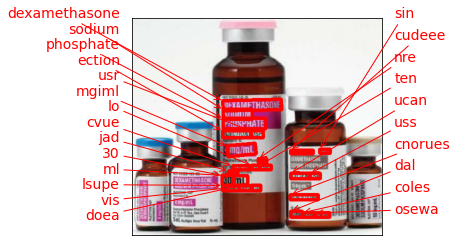



[Tesseract]
/aiffel/aiffel/explore15_OCR/drug/0000.png

Done


In [31]:
print('[keras-ocr]')
idx = drug_list.index('drug_10.png')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'drug_10.png'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


# TEXTBOOK

## Step1. 검증용 데이터셋 준비
---


In [32]:
text_img_dir = os.getenv('HOME') + '/aiffel/explore15_OCR/text'
text_list = os.listdir(text_img_dir)
text_list


['text_1.jpg',
 'text_10.jpg',
 'text_5.jpg',
 'text_7.jpg',
 'text_2.jpg',
 'text_6.jpg',
 'text_9.jpg',
 'text_8.jpg',
 'text_3.jpg',
 'text_4.jpg']

## Step2. keras-ocr, Tesseract로 테스트 진행
---

### Step2-1. keras-ocr

In [33]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()


Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [34]:
images = [ keras_ocr.tools.read(os.path.join(text_img_dir, text)) for text in text_list]
prediction_groups = [pipeline.recognize([os.path.join(text_img_dir, text)]) for text in text_list]


In [5]:
# # Plot the predictions
# fig, axs = plt.subplots(nrows=len(images), figsize=(200, 200))
# for idx, ax in enumerate(axs):
#     keras_ocr.tools.drawAnnotations(image=images[idx], 
#                                     predictions=prediction_groups[idx][0], ax=ax)


### Step2-2. Tesseract

In [6]:
# import os
# import pytesseract
# from PIL import Image
# from pytesseract import Output
# import matplotlib.pyplot as plt

# # OCR Engine modes(–oem):
# # 0 - Legacy engine only.
# # 1 - Neural nets LSTM engine only.
# # 2 - Legacy + LSTM engines.
# # 3 - Default, based on what is available.

# # Page segmentation modes(–psm):
# # 0 - Orientation and script detection (OSD) only.
# # 1 - Automatic page segmentation with OSD.
# # 2 - Automatic page segmentation, but no OSD, or OCR.
# # 3 - Fully automatic page segmentation, but no OSD. (Default)
# # 4 - Assume a single column of text of variable sizes.
# # 5 - Assume a single uniform block of vertically aligned text.
# # 6 - Assume a single uniform block of text.
# # 7 - Treat the image as a single text line.
# # 8 - Treat the image as a single word.
# # 9 - Treat the image as a single word in a circle.
# # 10 - Treat the image as a single character.
# # 11 - Sparse text. Find as much text as possible in no particular order.
# # 12 - Sparse text with OSD.
# # 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

# def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
#     if not os.path.exists(output_path):
#         os.mkdir(output_path)
#     custom_oem_psm_config = r'--oem 3 --psm 3'
#     image = Image.open(image_path)

#     recognized_data = pytesseract.image_to_data(
#         image, lang='eng',    # 한국어라면 lang='kor'
#         config=custom_oem_psm_config,
#         output_type=Output.DICT
#     )
    
#     top_level = max(recognized_data['level'])
#     index = 0
#     cropped_image_path_list = []
#     for i in range(len(recognized_data['level'])):
#         level = recognized_data['level'][i]
    
#         if level == top_level:
#             left = recognized_data['left'][i]
#             top = recognized_data['top'][i]
#             width = recognized_data['width'][i]
#             height = recognized_data['height'][i]
            
#             output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
#             print(output_img_path)
#             cropped_image = image.crop((
#                 left,
#                 top,
#                 left+width,
#                 top+height
#             ))
#             cropped_image.save(output_img_path)
#             cropped_image_path_list.append(output_img_path)
#             index += 1
#     return cropped_image_path_list



# def recognize_images(cropped_image_path_list):
#     custom_oem_psm_config = r'--oem 3 --psm 7'
    
#     for image_path in cropped_image_path_list:
#         image = Image.open(image_path)
#         recognized_data = pytesseract.image_to_string(
#             image, lang='eng',    # 한국어라면 lang='kor'
#             config=custom_oem_psm_config,
#             output_type=Output.DICT
#         )
#         print(recognized_data['text'])
#     print("Done")

    
# work_dir = os.getenv('HOME')+'/aiffel/explore15_OCR/text/'
# save_dir = os.getenv('HOME')+'/aiffel/explore15_OCR/text/tesseract_cropped'

# for i in text_list:
#     print(f'[{i}]')
#     img_file_path = work_dir + i
#     cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

#     # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
#     recognize_images(cropped_image_path_list)


## Step3. 테스트 결과 정리
---

#### text_1

[keras-ocr]


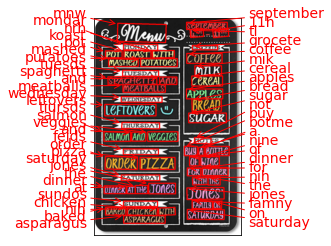



[Tesseract]
/aiffel/aiffel/explore15_OCR/text/0000.png
/aiffel/aiffel/explore15_OCR/text/0001.png
/aiffel/aiffel/explore15_OCR/text/0002.png
/aiffel/aiffel/explore15_OCR/text/0003.png
/aiffel/aiffel/explore15_OCR/text/0004.png
/aiffel/aiffel/explore15_OCR/text/0005.png
/aiffel/aiffel/explore15_OCR/text/0006.png
/aiffel/aiffel/explore15_OCR/text/0007.png
/aiffel/aiffel/explore15_OCR/text/0008.png
/aiffel/aiffel/explore15_OCR/text/0009.png
/aiffel/aiffel/explore15_OCR/text/0010.png
/aiffel/aiffel/explore15_OCR/text/0011.png
/aiffel/aiffel/explore15_OCR/text/0012.png
/aiffel/aiffel/explore15_OCR/text/0013.png
/aiffel/aiffel/explore15_OCR/text/0014.png
/aiffel/aiffel/explore15_OCR/text/0015.png
/aiffel/aiffel/explore15_OCR/text/0016.png
/aiffel/aiffel/explore15_OCR/text/0017.png
/aiffel/aiffel/explore15_OCR/text/0018.png
/aiffel/aiffel/explore15_OCR/text/0019.png
/aiffel/aiffel/explore15_OCR/text/0020.png
/aiffel/aiffel/explore15_OCR/text/0021.png
/aiffel/aiffel/explore15_OCR/text/0022.p

In [37]:
print('[keras-ocr]')
idx = text_list.index('text_1.jpg')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'text_1.jpg'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### text_2

[keras-ocr]


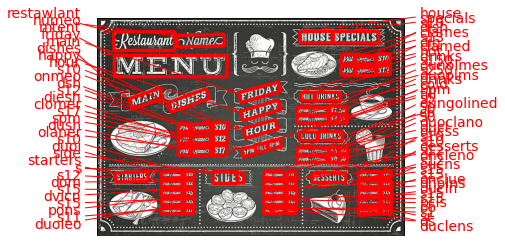



[Tesseract]
/aiffel/aiffel/explore15_OCR/text/0000.png
/aiffel/aiffel/explore15_OCR/text/0001.png
/aiffel/aiffel/explore15_OCR/text/0002.png
/aiffel/aiffel/explore15_OCR/text/0003.png
/aiffel/aiffel/explore15_OCR/text/0004.png
/aiffel/aiffel/explore15_OCR/text/0005.png
/aiffel/aiffel/explore15_OCR/text/0006.png
/aiffel/aiffel/explore15_OCR/text/0007.png
/aiffel/aiffel/explore15_OCR/text/0008.png
/aiffel/aiffel/explore15_OCR/text/0009.png
/aiffel/aiffel/explore15_OCR/text/0010.png
/aiffel/aiffel/explore15_OCR/text/0011.png
/aiffel/aiffel/explore15_OCR/text/0012.png
/aiffel/aiffel/explore15_OCR/text/0013.png
/aiffel/aiffel/explore15_OCR/text/0014.png



oe

a eee

i ts i i i i i i i i i i

i ts i i i i i i i i i i

i ts i i i i i i i i i i

i ts i i i i i i i i i i

i ts i i i i i i i i i i



Dat e\ewc $15

Dit elewo $17


Done


In [38]:
print('[keras-ocr]')
idx = text_list.index('text_2.jpg')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'text_2.jpg'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### text_3

[keras-ocr]


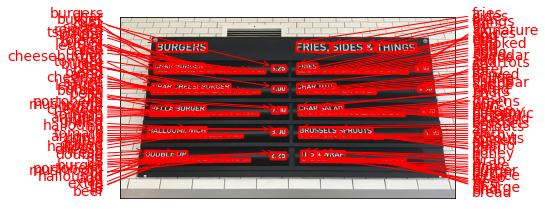



[Tesseract]
/aiffel/aiffel/explore15_OCR/text/0000.png
/aiffel/aiffel/explore15_OCR/text/0001.png
/aiffel/aiffel/explore15_OCR/text/0002.png
/aiffel/aiffel/explore15_OCR/text/0003.png
/aiffel/aiffel/explore15_OCR/text/0004.png
/aiffel/aiffel/explore15_OCR/text/0005.png
/aiffel/aiffel/explore15_OCR/text/0006.png
/aiffel/aiffel/explore15_OCR/text/0007.png
/aiffel/aiffel/explore15_OCR/text/0008.png
/aiffel/aiffel/explore15_OCR/text/0009.png
/aiffel/aiffel/explore15_OCR/text/0010.png
/aiffel/aiffel/explore15_OCR/text/0011.png
/aiffel/aiffel/explore15_OCR/text/0012.png
/aiffel/aiffel/explore15_OCR/text/0013.png
/aiffel/aiffel/explore15_OCR/text/0014.png
/aiffel/aiffel/explore15_OCR/text/0015.png
/aiffel/aiffel/explore15_OCR/text/0016.png
/aiffel/aiffel/explore15_OCR/text/0017.png
/aiffel/aiffel/explore15_OCR/text/0018.png
/aiffel/aiffel/explore15_OCR/text/0019.png
/aiffel/aiffel/explore15_OCR/text/0020.png
/aiffel/aiffel/explore15_OCR/text/0021.png
/aiffel/aiffel/explore15_OCR/text/0022.p

In [39]:
print('[keras-ocr]')
idx = text_list.index('text_3.jpg')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'text_3.jpg'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### text_4

[keras-ocr]


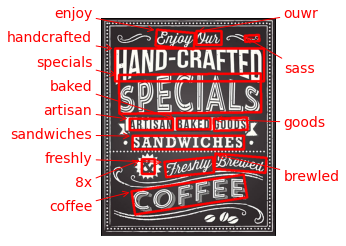



[Tesseract]
/aiffel/aiffel/explore15_OCR/text/0000.png
/aiffel/aiffel/explore15_OCR/text/0001.png
/aiffel/aiffel/explore15_OCR/text/0002.png
/aiffel/aiffel/explore15_OCR/text/0003.png
/aiffel/aiffel/explore15_OCR/text/0004.png
/aiffel/aiffel/explore15_OCR/text/0005.png
/aiffel/aiffel/explore15_OCR/text/0006.png
/aiffel/aiffel/explore15_OCR/text/0007.png
/aiffel/aiffel/explore15_OCR/text/0008.png
Mehta


oe







Done


In [40]:
print('[keras-ocr]')
idx = text_list.index('text_4.jpg')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'text_4.jpg'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### text_5

[keras-ocr]


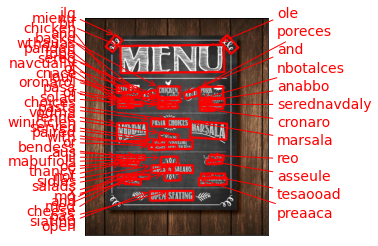



[Tesseract]
/aiffel/aiffel/explore15_OCR/text/0000.png
/aiffel/aiffel/explore15_OCR/text/0001.png
/aiffel/aiffel/explore15_OCR/text/0002.png
/aiffel/aiffel/explore15_OCR/text/0003.png
/aiffel/aiffel/explore15_OCR/text/0004.png
/aiffel/aiffel/explore15_OCR/text/0005.png
/aiffel/aiffel/explore15_OCR/text/0006.png
/aiffel/aiffel/explore15_OCR/text/0007.png
/aiffel/aiffel/explore15_OCR/text/0008.png
/aiffel/aiffel/explore15_OCR/text/0009.png
/aiffel/aiffel/explore15_OCR/text/0010.png
/aiffel/aiffel/explore15_OCR/text/0011.png
/aiffel/aiffel/explore15_OCR/text/0012.png
/aiffel/aiffel/explore15_OCR/text/0013.png
/aiffel/aiffel/explore15_OCR/text/0014.png
/aiffel/aiffel/explore15_OCR/text/0015.png
/aiffel/aiffel/explore15_OCR/text/0016.png
/aiffel/aiffel/explore15_OCR/text/0017.png
/aiffel/aiffel/explore15_OCR/text/0018.png
/aiffel/aiffel/explore15_OCR/text/0019.png
/aiffel/aiffel/explore15_OCR/text/0020.png
/aiffel/aiffel/explore15_OCR/text/0021.png
/aiffel/aiffel/explore15_OCR/text/0022.p

In [41]:
print('[keras-ocr]')
idx = text_list.index('text_5.jpg')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'text_5.jpg'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### text_6

[keras-ocr]


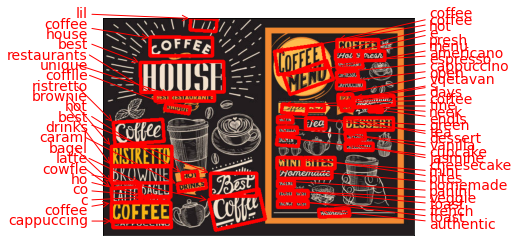



[Tesseract]
/aiffel/aiffel/explore15_OCR/text/0000.png
. a

Done


In [42]:
print('[keras-ocr]')
idx = text_list.index('text_6.jpg')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'text_6.jpg'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### text_7

[keras-ocr]


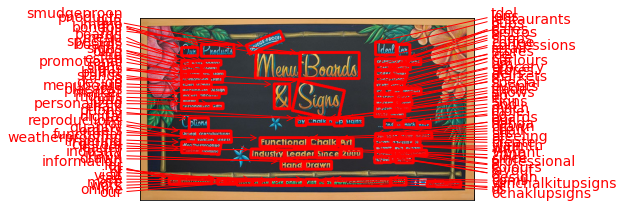



[Tesseract]
/aiffel/aiffel/explore15_OCR/text/0000.png
/aiffel/aiffel/explore15_OCR/text/0001.png
/aiffel/aiffel/explore15_OCR/text/0002.png
/aiffel/aiffel/explore15_OCR/text/0003.png
/aiffel/aiffel/explore15_OCR/text/0004.png
/aiffel/aiffel/explore15_OCR/text/0005.png
/aiffel/aiffel/explore15_OCR/text/0006.png
/aiffel/aiffel/explore15_OCR/text/0007.png
/aiffel/aiffel/explore15_OCR/text/0008.png
/aiffel/aiffel/explore15_OCR/text/0009.png
/aiffel/aiffel/explore15_OCR/text/0010.png
/aiffel/aiffel/explore15_OCR/text/0011.png
/aiffel/aiffel/explore15_OCR/text/0012.png
/aiffel/aiffel/explore15_OCR/text/0013.png
/aiffel/aiffel/explore15_OCR/text/0014.png
/aiffel/aiffel/explore15_OCR/text/0015.png
/aiffel/aiffel/explore15_OCR/text/0016.png
/aiffel/aiffel/explore15_OCR/text/0017.png
/aiffel/aiffel/explore15_OCR/text/0018.png
/aiffel/aiffel/explore15_OCR/text/0019.png
/aiffel/aiffel/explore15_OCR/text/0020.png
/aiffel/aiffel/explore15_OCR/text/0021.png
/aiffel/aiffel/explore15_OCR/text/0022.p

In [43]:
print('[keras-ocr]')
idx = text_list.index('text_7.jpg')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'text_7.jpg'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### text_8

[keras-ocr]


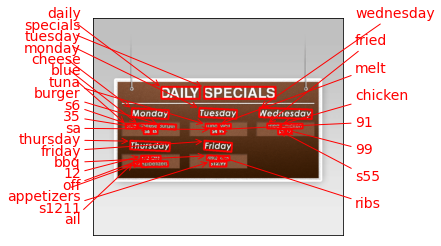



[Tesseract]
/aiffel/aiffel/explore15_OCR/text/0000.png
/aiffel/aiffel/explore15_OCR/text/0001.png
/aiffel/aiffel/explore15_OCR/text/0002.png
/aiffel/aiffel/explore15_OCR/text/0003.png
/aiffel/aiffel/explore15_OCR/text/0004.png
/aiffel/aiffel/explore15_OCR/text/0005.png
/aiffel/aiffel/explore15_OCR/text/0006.png
/aiffel/aiffel/explore15_OCR/text/0007.png
/aiffel/aiffel/explore15_OCR/text/0008.png
/aiffel/aiffel/explore15_OCR/text/0009.png
/aiffel/aiffel/explore15_OCR/text/0010.png
/aiffel/aiffel/explore15_OCR/text/0011.png
/aiffel/aiffel/explore15_OCR/text/0012.png
/aiffel/aiffel/explore15_OCR/text/0013.png
/aiffel/aiffel/explore15_OCR/text/0014.png
/aiffel/aiffel/explore15_OCR/text/0015.png
/aiffel/aiffel/explore15_OCR/text/0016.png
/aiffel/aiffel/explore15_OCR/text/0017.png
/aiffel/aiffel/explore15_OCR/text/0018.png
/aiffel/aiffel/explore15_OCR/text/0019.png
/aiffel/aiffel/explore15_OCR/text/0020.png
/aiffel/aiffel/explore15_OCR/text/0021.png
/aiffel/aiffel/explore15_OCR/text/0022.p

In [44]:
print('[keras-ocr]')
idx = text_list.index('text_8.jpg')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'text_8.jpg'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)

#### text_9

[keras-ocr]


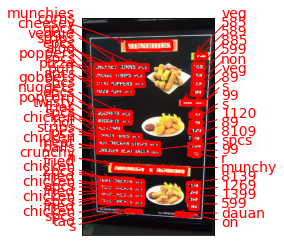



[Tesseract]
/aiffel/aiffel/explore15_OCR/text/0000.png
/aiffel/aiffel/explore15_OCR/text/0001.png
/aiffel/aiffel/explore15_OCR/text/0002.png
/aiffel/aiffel/explore15_OCR/text/0003.png
/aiffel/aiffel/explore15_OCR/text/0004.png
/aiffel/aiffel/explore15_OCR/text/0005.png
/aiffel/aiffel/explore15_OCR/text/0006.png
/aiffel/aiffel/explore15_OCR/text/0007.png
/aiffel/aiffel/explore15_OCR/text/0008.png
/aiffel/aiffel/explore15_OCR/text/0009.png
/aiffel/aiffel/explore15_OCR/text/0010.png
/aiffel/aiffel/explore15_OCR/text/0011.png
/aiffel/aiffel/explore15_OCR/text/0012.png
/aiffel/aiffel/explore15_OCR/text/0013.png
/aiffel/aiffel/explore15_OCR/text/0014.png
/aiffel/aiffel/explore15_OCR/text/0015.png
/aiffel/aiffel/explore15_OCR/text/0016.png
/aiffel/aiffel/explore15_OCR/text/0017.png
/aiffel/aiffel/explore15_OCR/text/0018.png
/aiffel/aiffel/explore15_OCR/text/0019.png
/aiffel/aiffel/explore15_OCR/text/0020.png
/aiffel/aiffel/explore15_OCR/text/0021.png
/aiffel/aiffel/explore15_OCR/text/0022.p

In [45]:
print('[keras-ocr]')
idx = text_list.index('text_9.jpg')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'text_9.jpg'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


#### text_10

[keras-ocr]


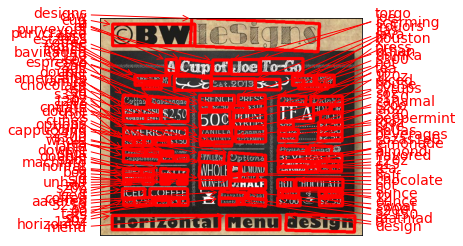



[Tesseract]
/aiffel/aiffel/explore15_OCR/text/0000.png
/aiffel/aiffel/explore15_OCR/text/0001.png
/aiffel/aiffel/explore15_OCR/text/0002.png
/aiffel/aiffel/explore15_OCR/text/0003.png
/aiffel/aiffel/explore15_OCR/text/0004.png
/aiffel/aiffel/explore15_OCR/text/0005.png
/aiffel/aiffel/explore15_OCR/text/0006.png
/aiffel/aiffel/explore15_OCR/text/0007.png
/aiffel/aiffel/explore15_OCR/text/0008.png
/aiffel/aiffel/explore15_OCR/text/0009.png
/aiffel/aiffel/explore15_OCR/text/0010.png
/aiffel/aiffel/explore15_OCR/text/0011.png
/aiffel/aiffel/explore15_OCR/text/0012.png
/aiffel/aiffel/explore15_OCR/text/0013.png
/aiffel/aiffel/explore15_OCR/text/0014.png
/aiffel/aiffel/explore15_OCR/text/0015.png
/aiffel/aiffel/explore15_OCR/text/0016.png
/aiffel/aiffel/explore15_OCR/text/0017.png
/aiffel/aiffel/explore15_OCR/text/0018.png
/aiffel/aiffel/explore15_OCR/text/0019.png
/aiffel/aiffel/explore15_OCR/text/0020.png
/aiffel/aiffel/explore15_OCR/text/0021.png
/aiffel/aiffel/explore15_OCR/text/0022.p

In [46]:
print('[keras-ocr]')
idx = text_list.index('text_10.jpg')
keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()
print()
print('\n[Tesseract]')
img_file_path = work_dir + 'text_10.jpg'
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
recognize_images(cropped_image_path_list)


## Step4. 결과 분석과 결론 제시
---


- 기본적으로 keras-ocr과 tesseract 두가지 방법을 사용하여 약통, 약품병 그리고 메뉴의 글씨들을 뽑아보았습니다. 
- 평면의 사진으로 시행했을 때에는 두가지 방법 다 괜찮은 결과를 나타내었습니다. 하지만 조금 둥근 약통이나 약품병을 시도했을 때, keras-ocr이 조금 더 좋은 결과를 나타내었습니다. 